In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/pielstroem/Statistik2019/master/Datensaetze/sp-authors.tsv", sep="\t")

In [3]:
df.head()

,id,author-fullname,author,birth,death,gender,pages-in-manual,novels,works,life-span,digitzed-by
0,1,Rosalía de Castro,RdCastro,1837,1885,female,17,1,1,48,6
1,2,Enrique Pérez Escrich,Escrich,1829,1897,male,1,4,17,68,5
2,3,Antonio de Trueba y de la Quintana,Trueba,1819,1889,male,1,0,1,70,6
3,4,José Selgas Carrasco,Selgas,1822,1882,male,1,5,7,60,4
4,5,Francisco Navarro Villoslada,Villoslada,1818,1895,male,1,0,0,77,5


<Axes: xlabel='death', ylabel='life-span'>

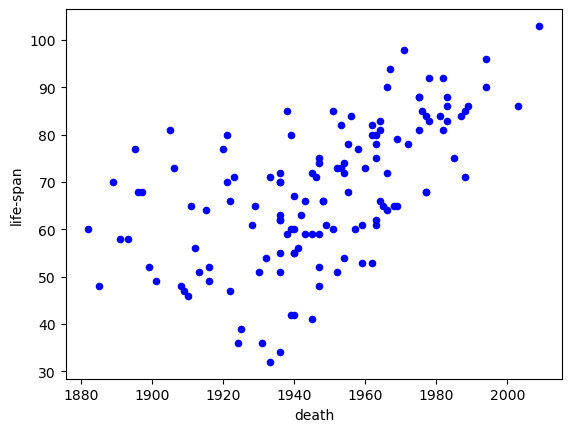

In [4]:
df.plot(x="death", y="life-span", kind="scatter", color="blue")

In [5]:
model=LinearRegression()

In [6]:
model.fit(df["death"].values.reshape(-1,1), df["life-span"])

LinearRegression()

In [7]:
print(model.coef_[0]) #steigung der geraden
print(model.intercept_) #y-achsenabschnitt (b): im jahr 0 geboren hat lebenserwartung von -554 jahren (linie geht imaginär bis jahr 0 runter)
print(model.score(df["death"].values.reshape((-1,1)), df["life-span"])) #mit jedem jahrzehnt werden leute um 0.3 jahre älter

0.31961036854932917
-554.493225282564
0.3377091887391087


In [8]:
model.predict(pd.Series([2000]).values.reshape(-1,1))

array([84.72751182])

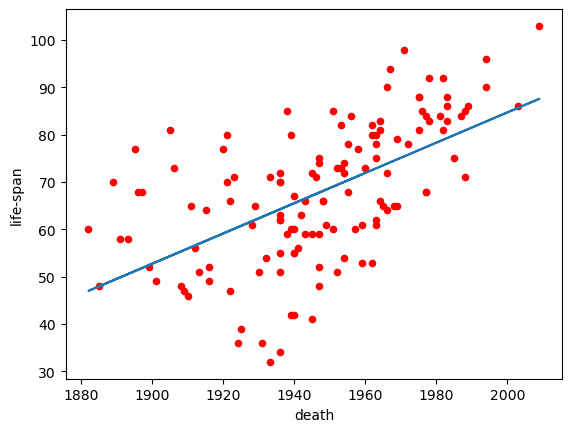

In [9]:
df.plot(x="death", y="life-span", kind="scatter", color="red")
plt.plot(df["death"].values.reshape(-1,1), model.predict(df["death"].values.reshape(-1,1)))
plt.show()

#### Alternative über statsmmodels

In [10]:
from statsmodels.formula.api import ols #ordinary least squares

In [11]:
df["lifespan"] = df["life-span"] #renamen erforderlich, da ols den bindestrich sonst als minus ansieht

In [12]:
model2 = ols('lifespan ~ death', data=df).fit() #life-span abhängig von death

In [13]:
model2.summary()
#hoher f-wert: ungleiche varianzen
#kleiner p-wert: wert ist signifikant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lifespan   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     66.80
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.24e-13
Time:                        10:05:51   Log-Likelihood:                -519.47
No. Observations:                 133   AIC:                             1043.
Df Residuals:                     131   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -554.4932     76.135     -7.283      0.000    -705.106    -403.880
death          0.3196      0.039      8.173      0.000       0.242       0.397
==============================================================================
Omnibus:                        1.937   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.984
Skew:                          -0.278   Prob(JB):                        0.371
Kurtosis:                       2.778   Cond. No.                     1.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Neuer Datensatz

In [14]:
stamps = pd.read_csv("https://pastebin.com/raw/1MUXdmsp")

In [15]:
stamps.head()

,Rating,Auflage,Preis
0,6.84,8.582,1428.0
1,6.47,2.336,1644.0
2,0.09,9.896,5.0
3,3.75,0.160,1620.0
4,3.38,11.714,569.0


In [16]:
import seaborn as sns

StopIteration: 

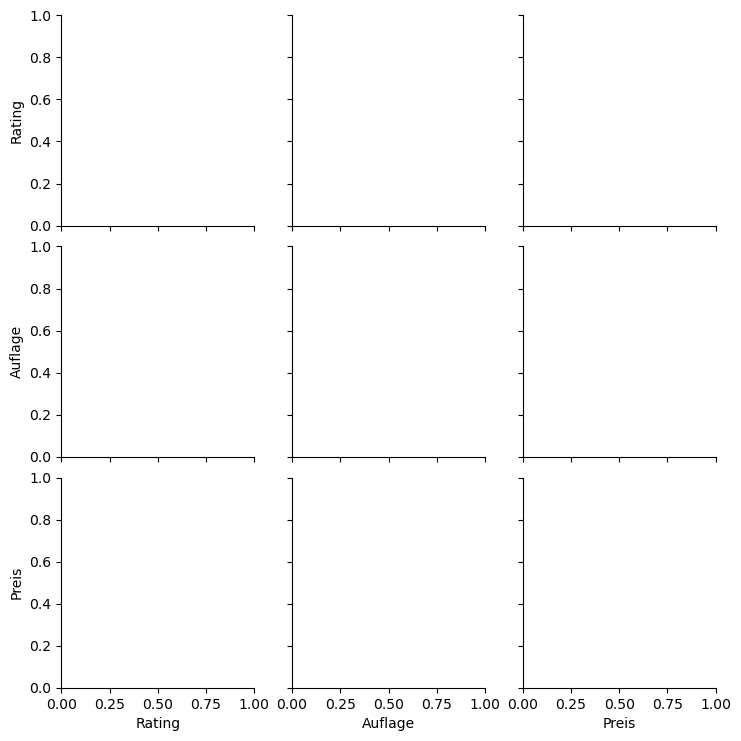

In [17]:
sns.pairplot(stamps)

In [18]:
model3 = ols("Preis ~ Auflage", data=stamps).fit()

In [19]:
model3.summary()
#ergebnis: auflage statistisch signifikant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     11.48
Date:                Mon, 04 Dec 2023   Prob (F-statistic):            0.00116
Time:                        10:06:27   Log-Likelihood:                -532.10
No. Observations:                  72   AIC:                             1068.
Df Residuals:                      70   BIC:                             1073.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1260.7593     86.395     14.593      0.000    1088.449    1433.070
Auflage      -37.1738     10.973     -3.388      0.001     -59.060     -15.288
==============================================================================
Omnibus:                        1.123   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                0.797
Skew:                           0.256   Prob(JB):                        0.671
Kurtosis:                       3.053   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model4 = ols("Preis ~ Rating", data=stamps).fit()
model4.summary()
#ergebnis: signifikanter, r² noch gut bei 59% (nähe der punkte zur regressionsgerade, je näher bei 1 desto besser)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     101.8
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.74e-15
Time:                        10:06:31   Log-Likelihood:                -505.24
No. Observations:                  72   AIC:                             1014.
Df Residuals:                      70   BIC:                             1019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    378.8558     70.811      5.350      0.000     237.628     520.084
Rating       188.0786     18.639     10.091      0.000     150.904     225.253
==============================================================================
Omnibus:                        1.513   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.327
Skew:                           0.330   Prob(JB):                        0.515
Kurtosis:                       2.912   Cond. No.                         8.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model5 = ols("Preis ~ Rating+Auflage", data=stamps).fit()
model5.summary()
#ergebnis: p-wert noch kleiner, F-Wert noch größer

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     104.9
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.20e-21
Time:                        10:06:34   Log-Likelihood:                -487.30
No. Observations:                  72   AIC:                             980.6
Df Residuals:                      69   BIC:                             987.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    630.5047     67.165      9.387      0.000     496.515     764.495
Rating       191.1729     14.640     13.058      0.000     161.966     220.380
Auflage      -39.6273      5.935     -6.676      0.000     -51.468     -27.787
==============================================================================
Omnibus:                        1.283   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.526   Jarque-Bera (JB):                1.138
Skew:                           0.303   Prob(JB):                        0.566
Kurtosis:                       2.895   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model6 = ols("lifespan ~ C(gender)", data=df).fit()
model6.summary()
#im mittel werden frauen 4.2 jahre älter (genter[T.male])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lifespan   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5947
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.442
Time:                        10:06:37   Log-Likelihood:                -546.57
No. Observations:                 133   AIC:                             1097.
Df Residuals:                     131   BIC:                             1103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            71.6250      5.251     13.640      0.000      61.237      82.013
C(gender)[T.male]    -4.1770      5.417     -0.771      0.442     -14.892       6.538
==============================================================================
Omnibus:                        2.404   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                1.930
Skew:                          -0.149   Prob(JB):                        0.381
Kurtosis:                       2.491   Cond. No.                         8.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ANOVA: analysis of variance
- male vs. female
- Varianzanalyse zur Signifikanzbestimmung

In [23]:
model7 = ols("lifespan ~ death + C(gender)", data=df).fit()
model7.summary()
#männlich wirkt sich negativ aus, das geburtsjahr positiv

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lifespan   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     34.10
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.24e-12
Time:                        10:06:43   Log-Likelihood:                -518.82
No. Observations:                 133   AIC:                             1044.
Df Residuals:                     130   BIC:                             1052.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -551.7107     76.096     -7.250      0.000    -702.258    -401.164
C(gender)[T.male]    -4.9775      4.415     -1.127      0.262     -13.711       3.756
death                 0.3206      0.039      8.204      0.000       0.243       0.398
==============================================================================
Omnibus:                        1.334   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                1.392
Skew:                          -0.230   Prob(JB):                        0.498
Kurtosis:                       2.802   Cond. No.                     1.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### ANCOVA - analysis of covariance (groups male - female)
- Prinzip: dreidimensionale Regression
- HA: mit Datensatz ausprobieren um max. R²-Wert zu erhalten, der nicht 1 ist UND Gedanken machen, welche Variablen vermutlich den größten Einfluss hatte

### Hausaufgabe

In [57]:
#adapting the header
df["pages_in_manual"] = df["pages-in-manual"]
df["digitzed_by"] = df["digitzed-by"]
df.head(2)

,id,author-fullname,author,birth,death,gender,pages-in-manual,novels,works,life-span,digitzed-by,lifespan,pages_in_manual,digitzed_by
0,1,Rosalía de Castro,RdCastro,1837,1885,female,17,1,1,48,6,48,17,6
1,2,Enrique Pérez Escrich,Escrich,1829,1897,male,1,4,17,68,5,68,1,5


***Vorgehen: Zur Betrachtung der genauen Zusammenhänge wurden zunächst die 1:1-Beziehungen näher betrachtet und in allen möglichen Kombinationen in einer Textdatei ausgegeben (heißt birth erhielt eine eigene Textdatei mit allen Relationen, dann death etc). So konnten schon einmal erste Ergebnisse betrachtet werden, um so im weiteren Verlauf sinnvolle Kombinationen aufgrund hoher R²-Werte miteinander kombinieren zu können.***

In [226]:
#import libraries
import pandas as pd
from statsmodels.formula.api import ols

column_input = "works ~ novels + birth"

#fit the model
#ha_model = ols("lifespan ~ death + C(gender)", data=df).fit() #original code
ha_model = ols(column_input, data=df).fit()

#print the model in jupyter
print(ha_model.summary())


"""#print model summary to a text file
with open("model_summary_combi.txt", "a") as file:
    file.write(f'{column_input}\n')
    file.write(ha_model.summary().as_text())
    file.write(f'\n\n*****************************************************************************************\n\n\n\n')

print("Model summary has been printed to a text file named 'model_summary.txt'.")"""

                            OLS Regression Results                            
Dep. Variable:                  works   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     51.36
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           3.66e-17
Time:                        12:47:33   Log-Likelihood:                -557.16
No. Observations:                 133   AIC:                             1120.
Df Residuals:                     130   BIC:                             1129.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    169.7454    123.055      1.379      0.1

'#print model summary to a text file\nwith open("model_summary_combi.txt", "a") as file:\n    file.write(f\'{column_input}\n\')\n    file.write(ha_model.summary().as_text())\n    file.write(f\'\n\n*****************************************************************************************\n\n\n\n\')\n\nprint("Model summary has been printed to a text file named \'model_summary.txt\'.")'

#### Beobachtungen nach Betrachtung bedeutender 1:1-Zusammenhänge:

birth: 
- death (R²=0.698, F-Statistik=302.7)
- digitzed_by (R²=0.450, F-Statistik=107.1)

death
- s. birth
- lifespan (R²=0.338, F-Statistik=66.8)
- digitzed_by (R²=0.295, F-Statistik=54.82)

digitzed_by
- s. birth
- s. death
- pages_in_manual (R²=0.277, F-Statistik=50.30)
- novels (R²=0.134, F-Statistik=20.27)
- works (R²=0.134, F-Statistik=20.29) => ähnlich zu novels!!!

lifespan
- death (R²=0.338, F-Statistik=66.80)

novels
- pages_in_manual (R²=0.211, F-Statistik=35.11)
- works (R²=0.433, F-Statistik=100.2)
- s.digitzed_by

pages_in_manual
- s. novels
- works (R²=0.123, F-Statistik=18.38)
- s. digitzed_by

works
- s. pages_in_manual
- s. novels
- s. digitzed_by

